<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">PyTorch and TensorFlow Comparison</h2>

Sources: [1](https://www.kaggle.com/rsouza/penguin-dataset-the-new-iris/edit) and [2](https://mahedihasanjisan.medium.com/pytorch-vs-tensorflow-deep-learning-model-f59cc868ed59)

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis[[source:WIkipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)]

Palmer Archipelago (Antarctica) penguin dataset appears to be a drop in replacement for the same. It is a great intro dataset for data exploration & visualization. Let's import the dataset and explore it to understand it better.

In [1]:
#!pip -q install bar_chart_race chart_studio cufflinks umap-learn

import os
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#import pycountry

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

#Racing Bar Chart
import bar_chart_race as bcr

%matplotlib inline

## Disable warnings 
#import warnings
#warnings.filterwarnings('ignore')

### Reading in the dataset

In [2]:
df = pd.read_csv('./data/penguins.csv')
df.head()

,studyName,SampleNumber,Species,Region,Island,Stage,IndividualID,ClutchCompletion,DateEgg,CulmenLength_mm,CulmenDepth_mm,FlipperLength_mm,BodyMass_g,Sex,Delta15N(o/oo),Delta13C(o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   studyName         344 non-null    object 
 1   SampleNumber      344 non-null    int64  
 2   Species           344 non-null    object 
 3   Region            344 non-null    object 
 4   Island            344 non-null    object 
 5   Stage             344 non-null    object 
 6   IndividualID      344 non-null    object 
 7   ClutchCompletion  344 non-null    object 
 8   DateEgg           344 non-null    object 
 9   CulmenLength_mm   342 non-null    float64
 10  CulmenDepth_mm    342 non-null    float64
 11  FlipperLength_mm  342 non-null    float64
 12  BodyMass_g        342 non-null    float64
 13  Sex               334 non-null    object 
 14  Delta15N(o/oo)    330 non-null    float64
 15  Delta13C(o/oo)    331 non-null    float64
 16  Comments          26 non-null     object 
dt

The dataset consists of 7 columns. 

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **culmen_length_mm**: culmen length (mm)
* **culmen_depth_mm**: culmen depth (mm)
* **flipper_length_mm**: flipper length (mm)
* **body_mass_g**: body mass (g)
* **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* **sex**: penguin sex

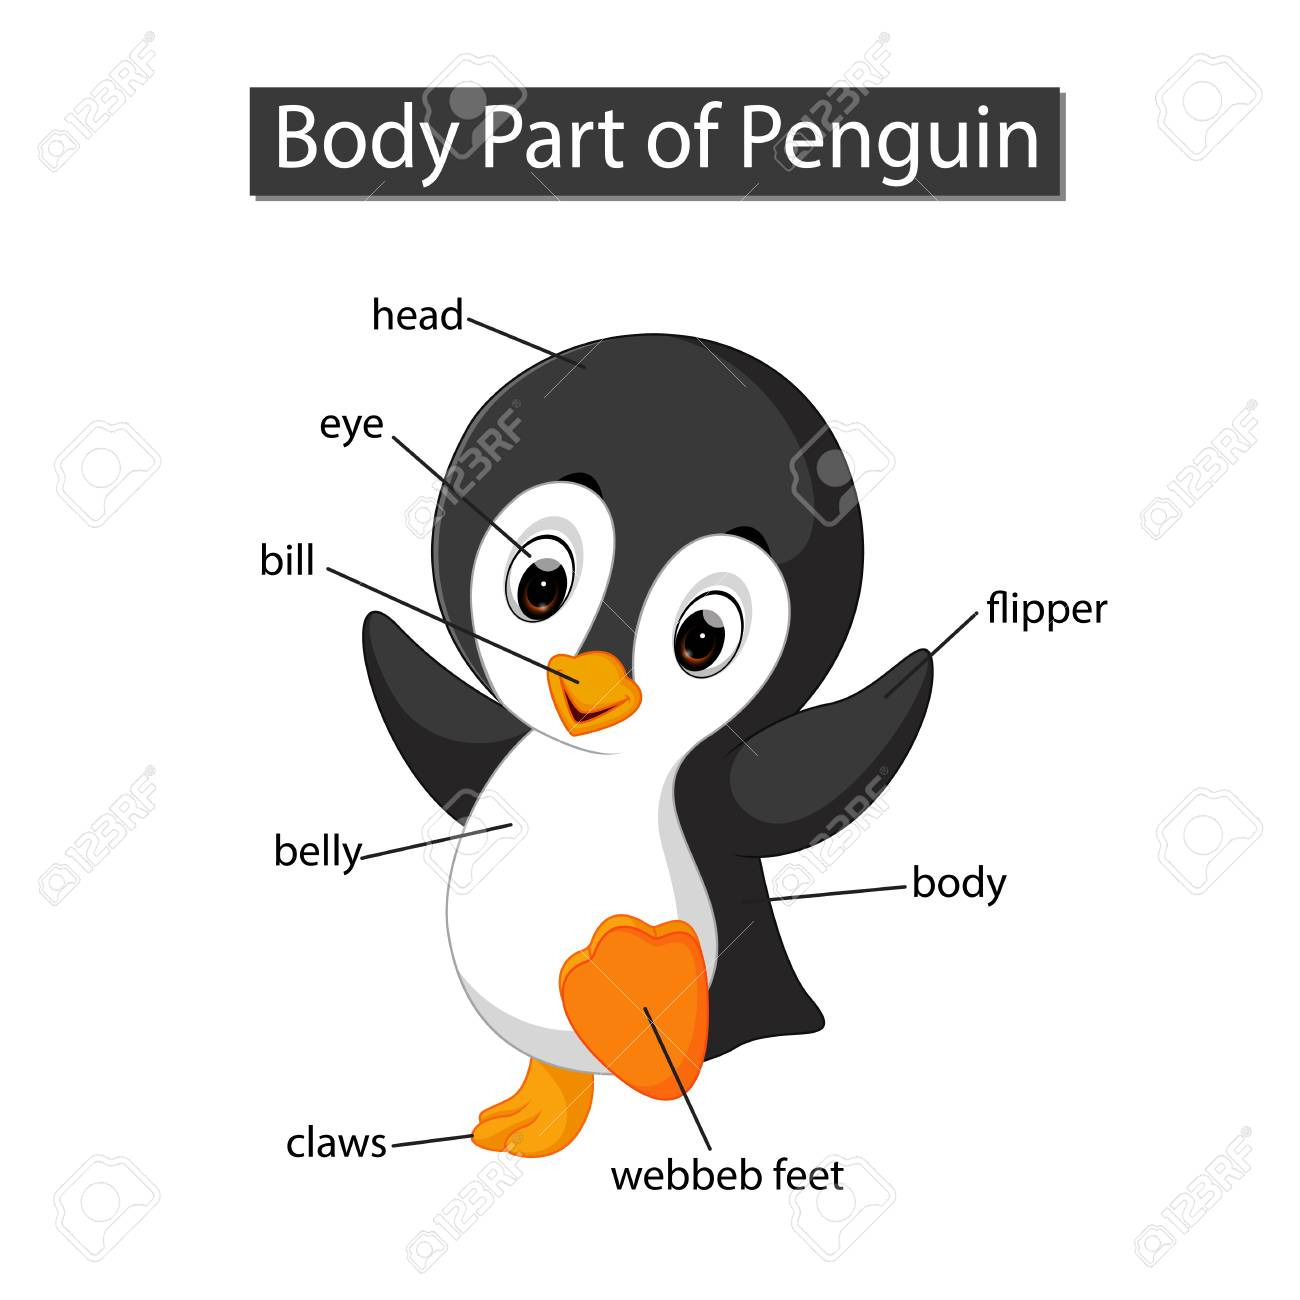

# Understanding the data



In [4]:
print(df.shape)

(344, 17)


In [5]:
df.describe(include='all')

,studyName,SampleNumber,Species,Region,Island,Stage,IndividualID,ClutchCompletion,DateEgg,CulmenLength_mm,CulmenDepth_mm,FlipperLength_mm,BodyMass_g,Sex,Delta15N(o/oo),Delta13C(o/oo),Comments
count,344,344.000000,344,344,344,344,344,344,344,342.000000,342.000000,342.000000,342.000000,334,330.000000,331.000000,26
unique,3,NaN,3,1,3,1,190,2,50,NaN,NaN,NaN,NaN,3,NaN,NaN,7
top,PAL0910,NaN,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N21A2,Yes,11/27/07,NaN,NaN,NaN,NaN,MALE,NaN,NaN,Nest never observed with full clutch.
freq,120,NaN,152,344,168,344,3,308,18,NaN,NaN,NaN,NaN,168,NaN,NaN,13
mean,NaN,63.151163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,8.733382,-25.686292,NaN
std,NaN,40.430199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.551770,0.793961,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,7.632200,-27.018540,NaN
25%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,8.299890,-26.320305,NaN
50%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,8.652405,-25.833520,NaN
75%,NaN,95.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,9.172123,-25.062050,NaN


## Covariance & Correlation

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. 
Source: https://tinyurl.com/yd2pezss

In [6]:
# Covariance

print('Covariance:')
df.cov()

Covariance:


,SampleNumber,CulmenLength_mm,CulmenDepth_mm,FlipperLength_mm,BodyMass_g,Delta15N(o/oo),Delta13C(o/oo)
SampleNumber,1634.600990,-52.009045,-1.779071,23.151258,-227.623862,0.154585,-15.612673
CulmenLength_mm,-52.009045,29.807054,-2.534234,50.375765,2605.591912,-0.179601,0.818786
CulmenDepth_mm,-1.779071,-2.534234,3.899808,-16.212950,-747.370093,0.661464,0.675877
FlipperLength_mm,23.151258,50.375765,-16.212950,197.731792,9824.416062,-3.912035,-4.165074
BodyMass_g,-227.623862,2605.591912,-747.370093,9824.416062,643131.077327,-238.960788,-239.166514
Delta15N(o/oo),0.154585,-0.179601,0.661464,-3.912035,-238.960788,0.304451,0.248172
Delta13C(o/oo),-15.612673,0.818786,0.675877,-4.165074,-239.166514,0.248172,0.630374


In [7]:
print('Correlation:')
df.corr()

Correlation:


,SampleNumber,CulmenLength_mm,CulmenDepth_mm,FlipperLength_mm,BodyMass_g,Delta15N(o/oo),Delta13C(o/oo)
SampleNumber,1.000000,-0.236356,-0.022352,0.040849,-0.007042,0.006952,-0.488690
CulmenLength_mm,-0.236356,1.000000,-0.235053,0.656181,0.595110,-0.059759,0.189025
CulmenDepth_mm,-0.022352,-0.235053,1.000000,-0.583851,-0.471916,0.605874,0.429933
FlipperLength_mm,0.040849,0.656181,-0.583851,1.000000,0.871202,-0.507787,-0.376223
BodyMass_g,-0.007042,0.595110,-0.471916,0.871202,1.000000,-0.537888,-0.374638
Delta15N(o/oo),0.006952,-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta13C(o/oo),-0.488690,0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


In [8]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Missing values

In [9]:
missing = missing_values_table(df)
missing

Your selected dataframe has 17 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
Comments,318,92.4
Delta15N(o/oo),14,4.1
Delta13C(o/oo),13,3.8
Sex,10,2.9
CulmenLength_mm,2,0.6
CulmenDepth_mm,2,0.6
FlipperLength_mm,2,0.6
BodyMass_g,2,0.6


In [10]:
# Handling missing values

from sklearn.impute import SimpleImputer

#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')
# strategy can also be mean or median 

df.iloc[:,:] = imputer.fit_transform(df)

In [11]:
df.isnull().sum()

studyName           0
SampleNumber        0
Species             0
Region              0
Island              0
Stage               0
IndividualID        0
ClutchCompletion    0
DateEgg             0
CulmenLength_mm     0
CulmenDepth_mm      0
FlipperLength_mm    0
BodyMass_g          0
Sex                 0
Delta15N(o/oo)      0
Delta13C(o/oo)      0
Comments            0
dtype: int64

## Convert sex column to integer values

In [12]:
lb = LabelEncoder()
df["Sex"] = lb.fit_transform(df["Sex"])
df['Sex'][:5]

0    2
1    1
2    1
3    2
4    1
Name: Sex, dtype: int64

# Analysing the data visually

## Number of Species

In [13]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

Unlike, Iris dataset which has equal number of all the species of flowers(50 each), the penguins dataset has different number of samples for each species.

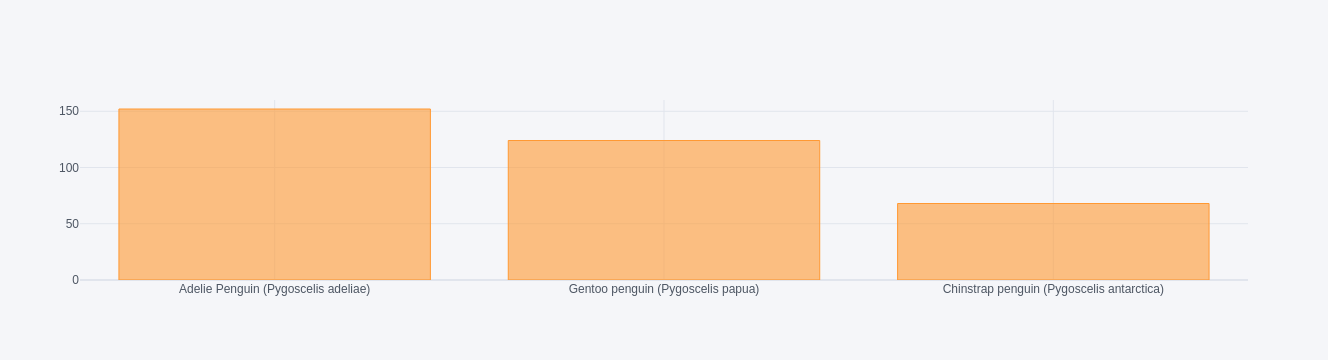

In [14]:
df['Species'].value_counts().iplot(kind='bar')

# Boxplot

The box plot of the dataset,will show us the visual representation of how our data is scattered over the the plane

<AxesSubplot:>

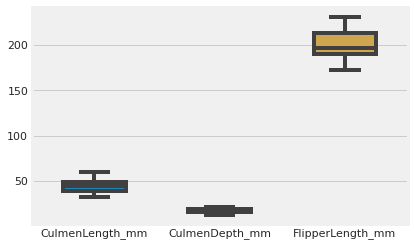

In [15]:
df1 = df[['CulmenLength_mm', 'CulmenDepth_mm','FlipperLength_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

# Scatterplot
The scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

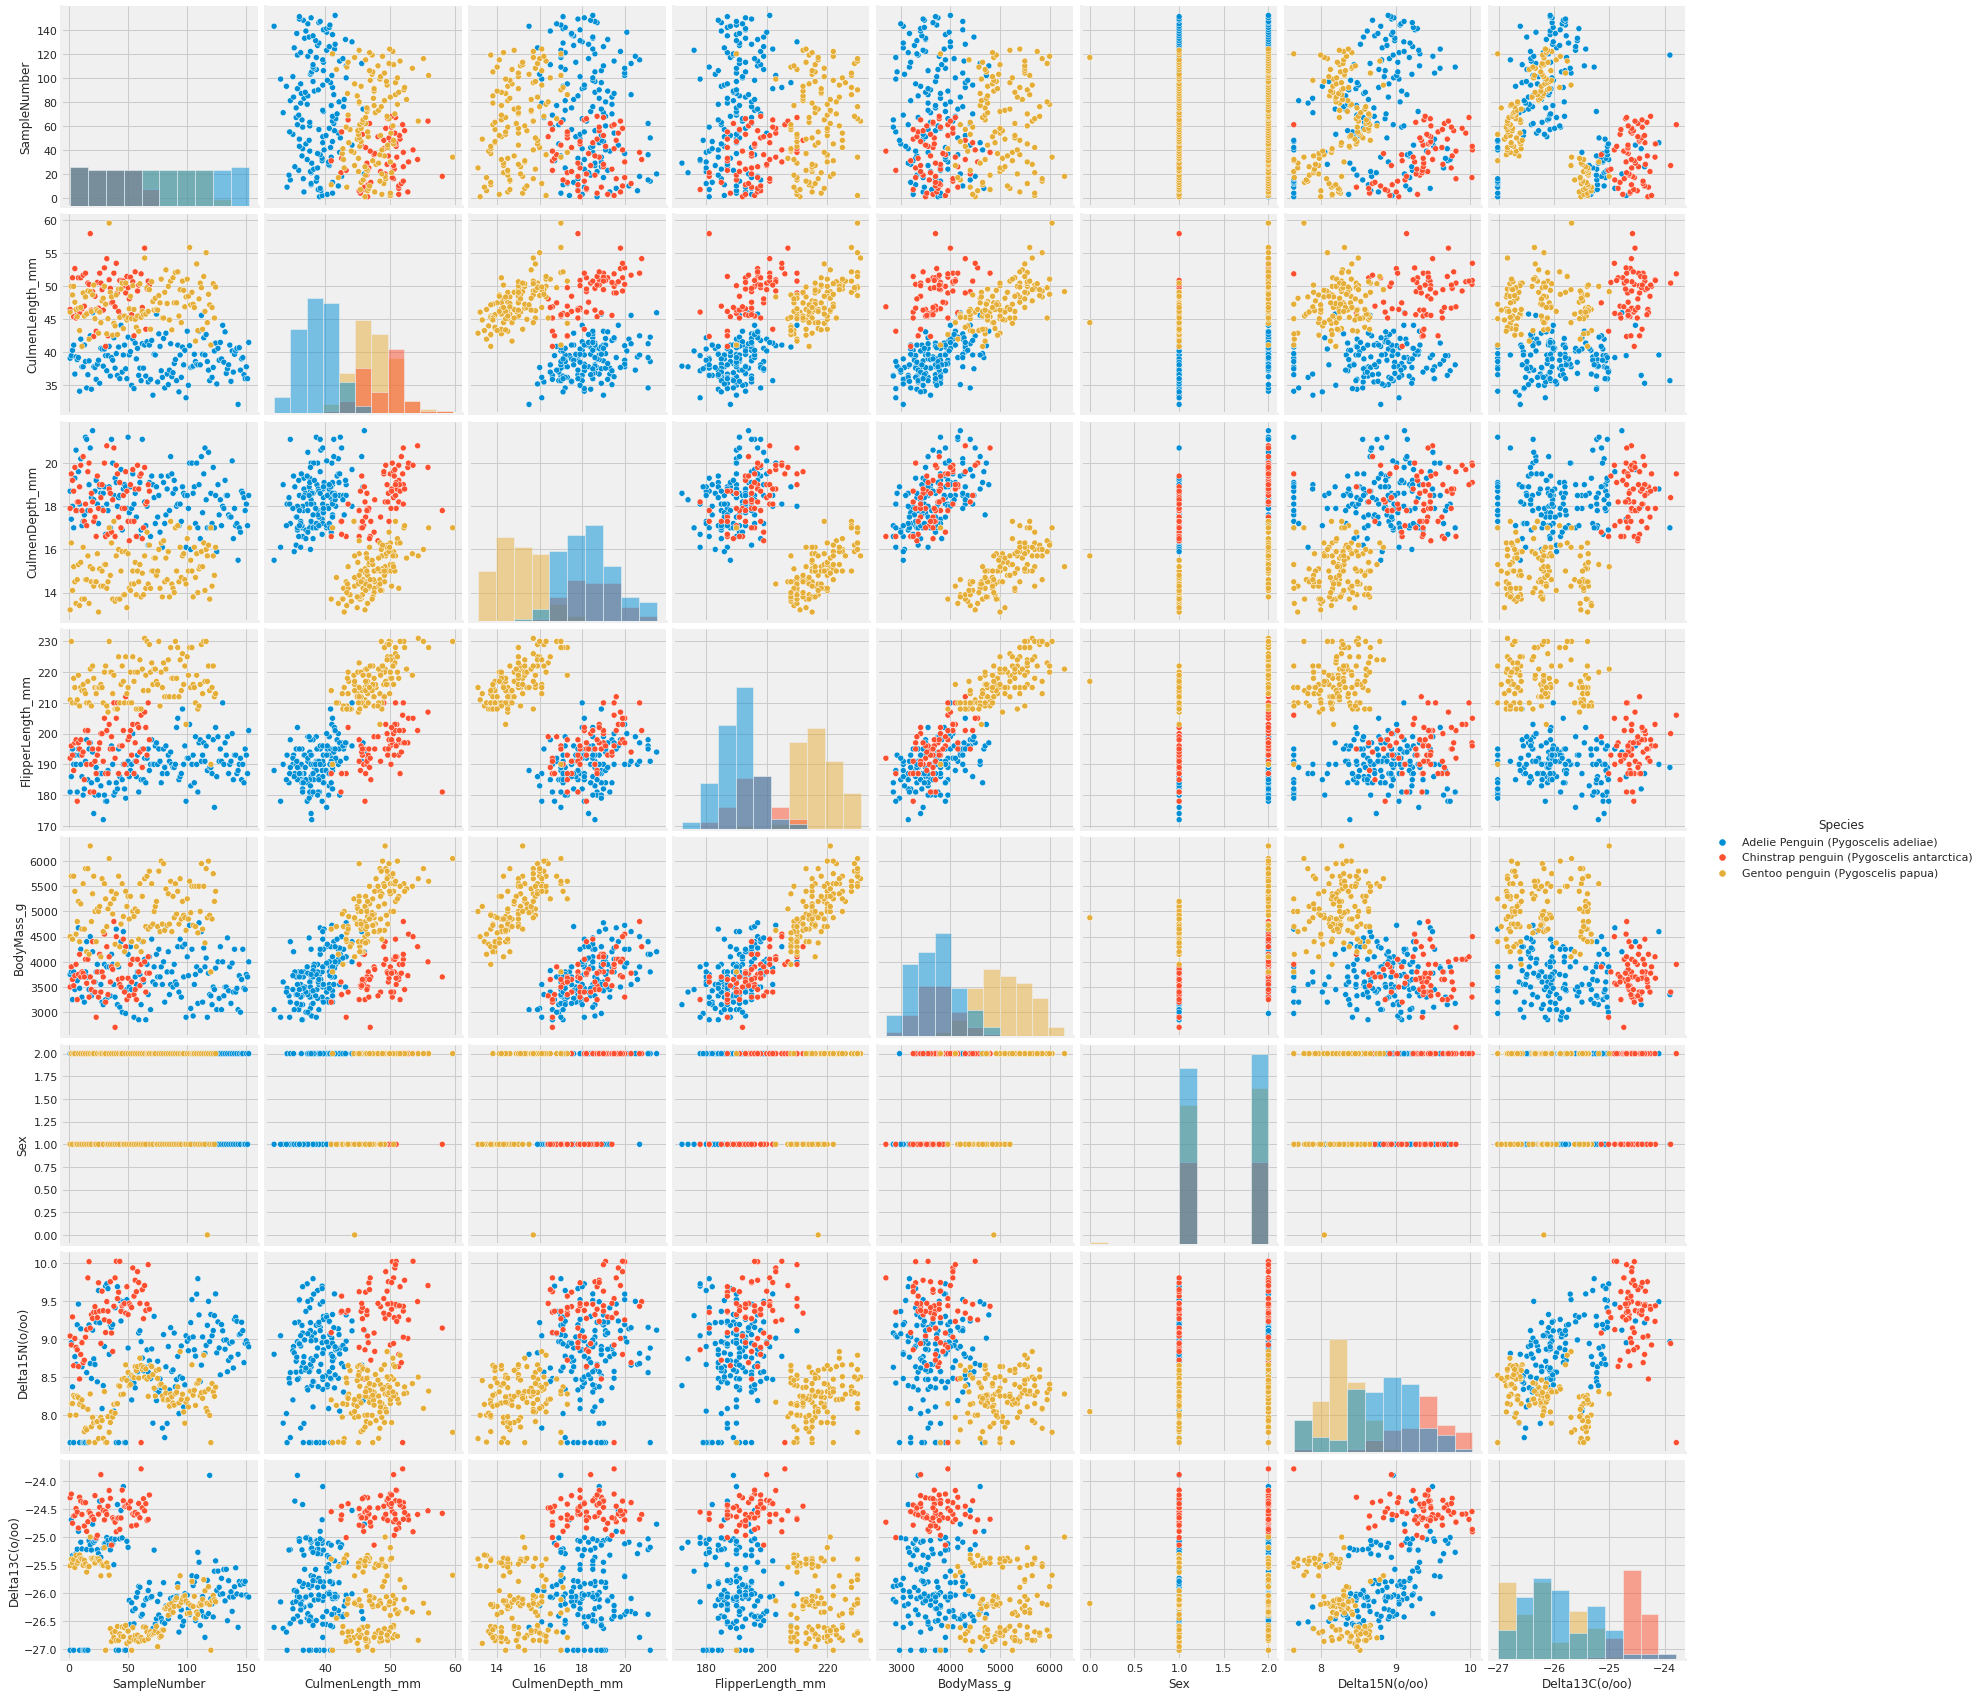

In [16]:
sns.pairplot(df, hue="Species", height=3,diag_kind="hist")

## culmen_depth vs culmen_length

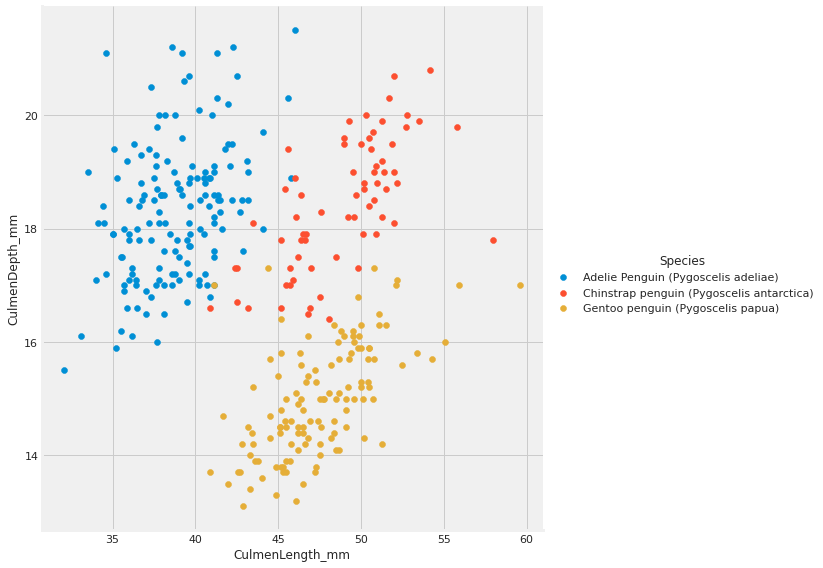

In [17]:
sns.FacetGrid(df, hue="Species", height=8).map(plt.scatter, "CulmenLength_mm", "CulmenDepth_mm").add_legend()

## culmen_depth vs flipperlength


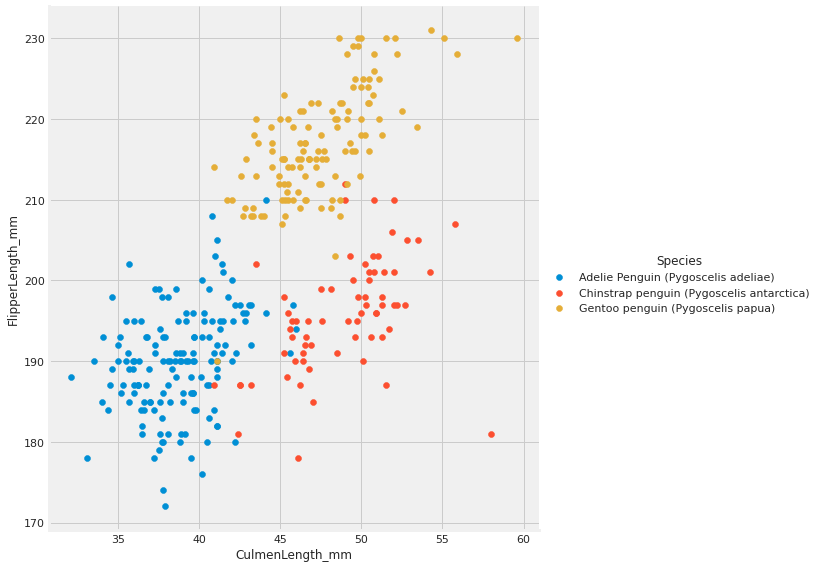

In [18]:
sns.FacetGrid(df, hue="Species", height=8).map(plt.scatter, "CulmenLength_mm", "FlipperLength_mm").add_legend()

# Flipperlength distribution

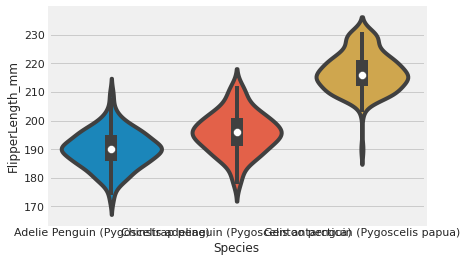

In [19]:
ax = sns.violinplot(x="Species", y="FlipperLength_mm", data=df, height=8)


## KDEPlot

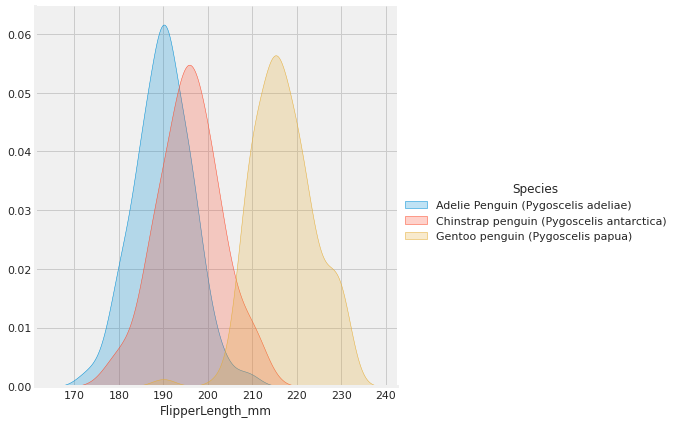

In [20]:
sns.FacetGrid(df, hue="Species", height=6,).map(sns.kdeplot, "FlipperLength_mm",shade=True).add_legend()

## Flipper length vs. body mass


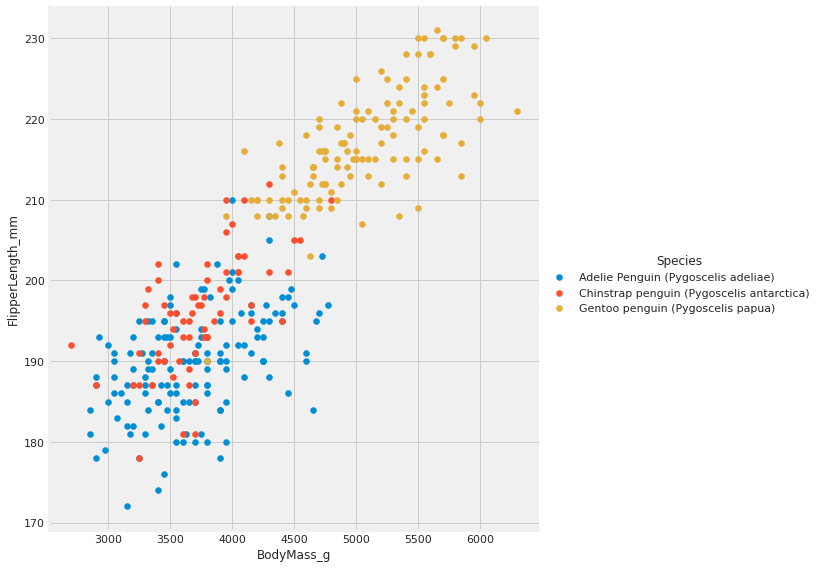

In [21]:
sns.FacetGrid(df, hue="Species", height=8).map(plt.scatter, "BodyMass_g", "FlipperLength_mm").add_legend()

# UMAP

To use UMAP for this task we need to first construct a UMAP object that will do the job for us

In [22]:
import umap
reducer = umap.UMAP()

2021-10-05 12:25:03.901793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-05 12:25:03.901810: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [23]:
penguin_data = df[["CulmenLength_mm", "CulmenDepth_mm", "FlipperLength_mm", "BodyMass_g",]].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [24]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(344, 2)

In [25]:
#plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in df.Species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the Penguin dataset', fontsize=24)

In [26]:
df.Species.value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

## PyTorch vs Tensorflow (Deep Learning Model)

In [27]:
data = df.copy()

data['FlipperLength'] = data['FlipperLength_mm']/10
data['BodyMass'] = data['BodyMass_g']/100
#data['Species'] = data['Species'].astype('category')

data['Species'] = data.Species.map({"Adelie Penguin (Pygoscelis adeliae)": 0, 
                                    "Gentoo penguin (Pygoscelis papua)": 1, 
                                    "Chinstrap penguin (Pygoscelis antarctica)": 2}).astype('float32')

for i in range(1,3):
    data = data.append(data)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 343
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   studyName         1376 non-null   object 
 1   SampleNumber      1376 non-null   int64  
 2   Species           1376 non-null   float32
 3   Region            1376 non-null   object 
 4   Island            1376 non-null   object 
 5   Stage             1376 non-null   object 
 6   IndividualID      1376 non-null   object 
 7   ClutchCompletion  1376 non-null   object 
 8   DateEgg           1376 non-null   object 
 9   CulmenLength_mm   1376 non-null   float64
 10  CulmenDepth_mm    1376 non-null   float64
 11  FlipperLength_mm  1376 non-null   float64
 12  BodyMass_g        1376 non-null   float64
 13  Sex               1376 non-null   int64  
 14  Delta15N(o/oo)    1376 non-null   float64
 15  Delta13C(o/oo)    1376 non-null   float64
 16  Comments          1376 non-null   object 
 

Train Test Split:

In [28]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength_mm', 'CulmenDepth_mm', 'FlipperLength_mm', 'BodyMass_g']
labels = 'Species'

x_train, x_test, y_train, y_test = train_test_split(data[features].values, data[labels].values, test_size=0.30, random_state=0)

Next up, we have to split the dataset into training and testing sets. We have used 70% and 30% for training and testing set accordingly. The code for both modules is the same!

In [29]:
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))

Training Set: 963, Test Set: 413 



In [30]:
#Installing PyTorch and Tensorflow:

#!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install — upgrade tensorflow

Loading the Libraries for both modules:

In [32]:
import torch
import torch.nn as nn
import torch.utils.data as td
# Set random seed for reproducability
torch.manual_seed(0)
print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.9.1+cu102


In [33]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.5.0
TensorFlow version: 2.5.0


Now that we have everything we need, let’s build the model:
First up, we have to prepare the data for both modules!

### PyTorch:

“PyTorch makes use of data loaders to load training and validation data in batches. We need to wrap those in PyTorch datasets (in which the data is converted to PyTorch tensor objects) and create loaders to read batches from those datasets.”

In [34]:
# Preparing Train data
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x, train_y)
train_loader = td.DataLoader(train_ds, batch_size=20, shuffle=False, num_workers=1)

# Preparing Test data
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x, test_y)
test_loader = td.DataLoader(test_ds, batch_size=20, shuffle=False, num_workers=1)

### Tensorflow:

“In TensorFlow, we need to set the data type of our features to 32-bit floating-point numbers and specify that the labels represent categorical classes rather than numeric value

In [35]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

### Deep neural network model setup:

The neural network concept is the same for both modules! The way of writing is different. 

In PyTorch, We need to create a class where we have to initialize our model layers and neurons in each layer. In this simple model, we created three layers, a neural network model. The First layer takes input based on the features space, and we set 10 neurons for both the first and second hidden layers. The third layer is the output layer which will produce the label spaces. In this case, the output space is 3! 
The first two layers will use the ReLU activation function and the output layer will use the Softmax activation function!  

### PyTorch:

In [36]:
class NModel(nn.Module):
    def __init__(self):
        super(NModel, self).__init__()
        self.fc1 = nn.Linear(len(features), 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x
    
Pmodel = NModel()
print(Pmodel)

NModel(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


### Tensorflow:

In Tensorflow, we have to use the sequential model in this case. In the sequential model, we used dense layers with 10 neurons! If you compare the both models for PyTorch and Tensorflow, then you will be able to figure out that both model structure is same but representation is different!

In [37]:
Tmodel = Sequential()
Tmodel.add(Dense(10, input_dim=len(features), activation='relu'))
Tmodel.add(Dense(10, input_dim=10, activation='relu'))
Tmodel.add(Dense(len(data.Species.unique()), input_dim=10, activation='softmax'))
print(Tmodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


2021-10-05 12:28:45.204047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-05 12:28:45.204067: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-05 12:28:45.204082: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (viena): /proc/driver/nvidia/version does not exist
2021-10-05 12:28:45.204254: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Alright, so far we have pre-processed the dataset to feed into the deep learning model based on PyTorch and Tensorflow. Let’s run and test them!  

### PyTorch:

In [38]:
# Train:

def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        
        # feedforward step
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()        
        
        # backpropagation to improve the model performances
        loss.backward()
        optimizer.step()    
    
    # Return average loss of the training 
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

# Test:

def test(model, data_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            
            # Get the predictions
            out = model(data)            
            
            # calculate the loss
            test_loss += loss_criteria(out, target).item()            
            
            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

### Additional Setup:

In [39]:
# Specify the loss criteria (CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# We are using Adam optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(Pmodel.parameters(), lr=learning_rate) # setting the Adam algorithm
optimizer.zero_grad()

# We'll be saving metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):    
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(Pmodel, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(Pmodel, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

Epoch: 2
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

Epoch: 3
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

Epoch: 4
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

Epoch: 5
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

Epoch: 6
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

Epoch: 7
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

Epoch: 8
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

Epoch: 9
Training set: Average loss: 1.194642
Validation set: Average loss: 1.181848, Accuracy: 152/413 (37%)

E

Tensorflow:  

In [40]:
learning_rate = 0.001 # learning rate
opt = optimizers.Adam(learning_rate=learning_rate) # model optimizer

# compiling the model with CC loss and optimizer! Along with Acc. metrics!
Tmodel.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])


# we will do 50 sets of run and in epochs, 10 will be the batch size
num_epochs = 50
history = Tmodel.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

2021-10-05 12:28:59.384433: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-05 12:28:59.418139: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3000000000 Hz


Epoch 1/50
97/97 [==============================] - 1s 3ms/step - loss: 1108.1388 - accuracy: 0.1931 - val_loss: 538.4363 - val_accuracy: 0.2082
Epoch 2/50
97/97 [==============================] - 0s 747us/step - loss: 249.5556 - accuracy: 0.2066 - val_loss: 33.9888 - val_accuracy: 0.2082
Epoch 3/50
97/97 [==============================] - 0s 779us/step - loss: 10.6973 - accuracy: 0.3562 - val_loss: 1.0640 - val_accuracy: 0.3680
Epoch 4/50
97/97 [==============================] - 0s 741us/step - loss: 1.0568 - accuracy: 0.3572 - val_loss: 1.0628 - val_accuracy: 0.3680
Epoch 5/50
97/97 [==============================] - 0s 741us/step - loss: 1.0550 - accuracy: 0.4060 - val_loss: 1.0618 - val_accuracy: 0.4237
Epoch 6/50
97/97 [==============================] - 0s 736us/step - loss: 1.0533 - accuracy: 0.4496 - val_loss: 1.0609 - val_accuracy: 0.4237
Epoch 7/50
97/97 [==============================] - 0s 741us/step - loss: 1.0519 - accuracy: 0.4496 - val_loss: 1.0602 - val_accuracy: 0.4237

So far, we have seen the difference between PyTorch and Tensorflow to run the model. Let’s discuss it: “In each epoch, the full set of training data is passed forward through the network. In each epoch, 10 batches of data are provided. Typically, a neural network consists of forwarding propagation and backpropagation. In each layer, each neuron uses an activation function to produce neurons' weights and biases! At the output layer, the loss function is used to validate model performances. That’s where the backpropagation comes in. Backpropagation is useful to improve model weights and biases, which eventually helps to produce a better model. Also, At the end of each epoch, the validation data is passed through the network, and its loss and accuracy are also calculated. It’s important to do this because it enables us to compare the performance of the model using data on which it was not trained, helping us determine if it will generalize well for new data or if it’s overfitted to the training data.”

Visualize the training and validation Phase:

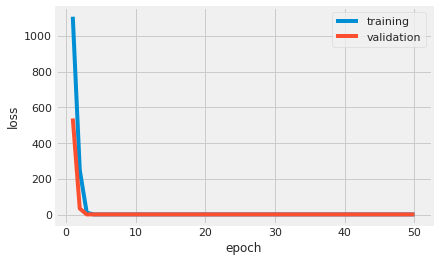

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Model Weights and Biases:

In [42]:
# PyTorch:

for param_tensor in Pmodel.state_dict():
    print(param_tensor, "\n", Pmodel.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.00374341  0.2682218  -0.41152257 -0.3679695 ]
 [-0.19257718  0.13407868 -0.00990659  0.39644474]
 [-0.04437202  0.13230628 -0.15110654 -0.09828269]
 [-0.47767425 -0.33114105 -0.20611155  0.01852179]
 [ 0.1976676   0.3000114  -0.33897054 -0.21773142]
 [ 0.18160856  0.41519397 -0.10290009  0.37415588]
 [-0.08059168  0.05290705  0.4527381  -0.46383518]
 [-0.31476897 -0.12658262 -0.19489998  0.4320004 ]
 [-0.32408983 -0.23016644 -0.34932023 -0.4682805 ]
 [-0.29187024  0.42979902  0.22310919  0.24233627]]
fc1.bias 
 [ 0.02629578 -0.25634176  0.08459234 -0.46684736 -0.36128312 -0.257765
  0.31546897  0.29316062 -0.22174752 -0.01804119]
fc2.weight 
 [[ 0.20224684  0.31437248  0.12550516  0.04272011  0.21202639 -0.18619564
   0.05892716 -0.24517313 -0.21917309 -0.16335806]
 [ 0.14308454  0.12717429 -0.18731831  0.09553465  0.1736002  -0.03991343
   0.01207406  0.07327146  0.1961803   0.30364004]
 [-0.24369256 -0.11588791  0.12428064  0.2620103   0.2751837   0.2790257
   0.062

In [43]:
# Tensorflow:

for layer in Tmodel.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print("—————— \nWeights:\n",weights,"\nBiases:\n", biases)

—————— 
Weights:
 [[-0.27236846 -0.3841947   0.04633737  0.08020484 -0.10909867  0.32816195
  -0.140357    0.50953186  0.2701363  -0.4905011 ]
 [ 0.27471453  0.21265197  0.09460604 -0.17707926 -0.10406601  0.09051599
   0.4109637   0.05482585  0.4671379  -0.5447268 ]
 [-0.28836262 -0.634329    0.29639256  0.34767175  0.23550075 -0.03283319
   0.20415187 -0.7389658  -0.5707726   0.3296095 ]
 [-0.42851955 -0.24623463 -0.27315575 -0.5230521  -0.43773973  0.2803461
  -0.01932133  0.48991284  0.5597984  -0.4691702 ]] 
Biases:
 [ 0.          0.          0.          0.          0.         -0.07729585
 -0.131296   -0.15056092  0.02218138  0.        ]
—————— 
Weights:
 [[ 0.0607031  -0.30530828  0.39975524  0.3037489   0.15896738  0.03326017
  -0.53190327  0.40915883 -0.03316814 -0.1240823 ]
 [ 0.42301047  0.14984506 -0.54566675  0.3919103  -0.4295466   0.50397205
  -0.31616646  0.17803025 -0.41518384 -0.38429344]
 [ 0.5336163   0.37752342 -0.4790918   0.17206895 -0.04215616  0.5297911
   0.427

Confusion Matrix:

PyTorch and Tensorflow:

NameError: name 'penguin_classes' is not defined

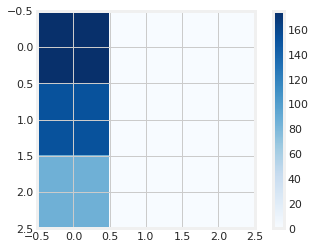

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

class_probabilities = Tmodel.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()